In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#a few unecessary libraries in here, but keep them in case you want to test them out

In [20]:
sc_data1 = pd.ExcelFile(r'C:\Users\Michael G\Documents\Play1Data.xlsx')
sc_data = pd.read_excel(sc_data1, 'Range Bound Play 1 (V2)-FLAT')

In [21]:
sc_data = sc_data.rename(columns = {'Opening Price % Retracement of Prior Move (relative to day)': 'PM_Retracement'})
sc_data = sc_data.rename(columns = {'Pullback % from open (relative to day) ': 'Pullback'})


#need to understand data transformation -- task

-0.2667631791418184

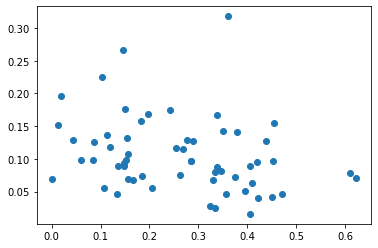

In [41]:
sc_data.dropna(subset = ['Pullback % from open'], axis = 0, how = 'all', inplace = True)
sc_data.dropna(subset = ['Retracement of Prior Move % until lowerst low (Not relative)'], axis = 0, how = 'all', inplace = True)
sc_data.dropna(subset = ['FLOAT(M)'], axis = 0, how = 'all', inplace = True)
sc_data.dropna(subset = ['Squeeze %'], axis = 0, how = 'all', inplace = True)
#filters that will be implimented into gui, but in a different setting
f1  = sc_data['FLOAT(M)'] < 50
f2 = sc_data['PM VOL'] > 3000000
f3 = sc_data['MKT CAP(M)'] < 100
f4 = sc_data['Prior Close to PM Hi %'] > .75
f5 = sc_data['Time until ideal entry point (mins) from open'] > 5
f6 = sc_data['PM_Retracement'] < .3
f7 = sc_data['Pullback % from open'] < .19
#to apply filter -- sc_data[f1]

qq = sc_data


x = qq[['PM_Retracement']]
y = qq[['Pullback % from open']]
#y = qq[['Time until ideal entry point (mins) from open']]
#x = qq[['Pullback % from open']]


#There is a linear correlation between the two however most y values are between 1 and 5 for any x which makes the linear
#fairly worthless, i tested only doing y values between 1 and 5 and it was pretty much random 

#I've tested tons of combinations for x and y and none have proven to have linear correlation

#Others combinations need to be tested however data needs to be cleaned, sorted, and grouped better in order for a linear model
#to work 

#My assumption was that there would be a linear correlation between the PM_retracement (retracement from pm hi to open) and 
#the pullback percentage from open to the lowest low, however that doesnt seem to necesarilly be the case. 

#Ideas to better fix this: cluster into groups including: dipped below pm range support, range greater (and less than) than 50%
#of first spike --- just some thoughts -- obviously lots of kinks to workout with the groupings

#Until a well fitting model is found (r^2 >= .25) I will continue to use filtered averages and continue to clean/narrow in data

plt.scatter(x,y)
qq['Pullback % from open'].corr(sc_data['PM_Retracement'])
#negative correlation showing that the larger the pm retracement the less the pullback % will be - this was expected.

In [42]:
#Need to add to data: 
    #-Bottom of PM Range
    #-Range % of PM RANGE
    #- The % that the low goes past the PM Range support

In [43]:
np.any(np.isnan(x))
model = LinearRegression()

model.fit(x,y)

LinearRegression()

In [44]:
print(model.intercept_)
print(model.coef_)

[0.13304458]
[[-0.10346505]]


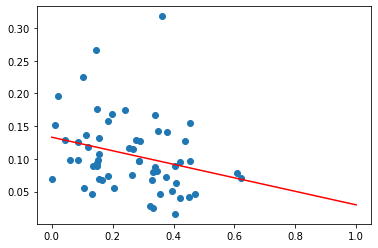

In [45]:
b0 = model.intercept_
b1 = model.coef_

xx = np.linspace(np.min(x),1)
yy = b0 + b1 * xx
plt.scatter(x,y)
plt.plot(xx, yy, color = 'red')

In [46]:
#There may be a negative linear correlation with the PM retracement and the pullback percentage, however it 
#will most likely be minimal due to the wide variance in data points

In [47]:
X = sm.add_constant(x)
model1 = sm.OLS(y,X).fit()
print(model1.summary())


X_train, x_test, Y_train, y_test = tts(x,y, test_size = .2, random_state = 1)


                             OLS Regression Results                             
Dep. Variable:     Pullback % from open   R-squared:                       0.071
Model:                              OLS   Adj. R-squared:                  0.055
Method:                   Least Squares   F-statistic:                     4.367
Date:                  Sat, 30 Jan 2021   Prob (F-statistic):             0.0411
Time:                          20:31:46   Log-Likelihood:                 88.018
No. Observations:                    59   AIC:                            -172.0
Df Residuals:                        57   BIC:                            -167.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.133

In [29]:
#As expected, the r^2 shows minimal prediction capabilities for PM retracement onto pullback %
#P value is above the normal alpha level of .05 


#Data have been cleaned once, adj r^2 increased by .03 and P value decreased by .05 -- good start

LinearRegression()

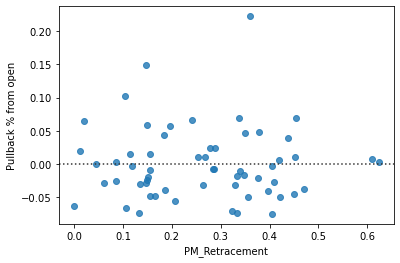

In [30]:
sns.residplot(x,y)
model2 = LinearRegression()
model2.fit(X_train, Y_train)

In [31]:
#Residuals seem to show standard error which is good, no patterns are visible

In [32]:

X2 = sm.add_constant(X)
model = sm.OLS(y, X2)
est = model.fit()

In [33]:
print(est.summary())

                             OLS Regression Results                             
Dep. Variable:     Pullback % from open   R-squared:                       0.071
Model:                              OLS   Adj. R-squared:                  0.055
Method:                   Least Squares   F-statistic:                     4.367
Date:                  Sat, 30 Jan 2021   Prob (F-statistic):             0.0411
Time:                          20:26:41   Log-Likelihood:                 88.018
No. Observations:                    59   AIC:                            -172.0
Df Residuals:                        57   BIC:                            -167.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.133